# Tasca M8 T01

## Objectivos
o	Limpieza e interpretación de los datos. 
o	Preprocesados y PCA. 
o	Encontrar número de clústeres óptimo 
o	Creación de modelos. unsupervised (k-means y clustering jerárquico).
o	Interpretar los resultados.


## Duración: 3 días


## Descripción
Ejercicios de algoritmos de Agrupació.

<font color='blue'>__.........................................................................................................................................................................................................................................................................__

# EJERCICIO 1
Descarga el dataset adjunto, de registros de publicaciones en Facebook sobre Tailandia, y clasifica los diferentes registros utilizando el algoritmo de K-means.
Importante: Ten en cuenta que previamente necesitarás preparar el dataset.

## PASO 1.1.- Análisis de datos.

- Importación de librerias y visualización del datarame original.
- Obtención de información sobre el tipo de datos y la presencia/ausencia de valores NaN mediante __df.info()__.
- Descripión estadística de las variables numéricas mediante __df.describe()__.
- Identificacion de valores únicos por variable mediante __df[i].nunique()__.

In [1]:
# IMPORTACIÓN DE LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Publicacions Facebook Thailandia.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [2]:
# INFORMACIÓN DE TIPO DE DATOS Y PRESENCIA/AUSENCIA DE VALORES NULOS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [3]:
# DESCRIPCIÓN ESTADÍSTICA DE LAS VARIABLES
df.describe().round(2)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,0.0,0.0,0.0,0.0
mean,230.12,224.36,40.02,215.04,12.73,1.29,0.70,0.24,0.11,NaN,NaN,NaN,NaN
std,462.63,889.64,131.60,449.47,39.97,8.72,3.96,1.60,0.73,NaN,NaN,NaN,NaN
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
25%,17.00,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
50%,59.50,4.00,0.00,58.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
75%,219.00,23.00,4.00,184.75,3.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
max,4710.00,20990.00,3424.00,4710.00,657.00,278.00,157.00,51.00,31.00,NaN,NaN,NaN,NaN


In [4]:
# IDENTIFICACIÓN DE VALORES ÚNICOS POR VARIABLE

column_names = [
    'status_id', 'status_type', 'status_published', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 
    'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3', 'Column4'
]

for i in column_names:
   num_uniques = df[i].nunique()
   print(f"Número de valores únicos en la variable {i}:", num_uniques)

Número de valores únicos en la variable status_id: 6997
Número de valores únicos en la variable status_type: 4
Número de valores únicos en la variable status_published: 6913
Número de valores únicos en la variable num_reactions: 1067
Número de valores únicos en la variable num_comments: 993
Número de valores únicos en la variable num_shares: 501
Número de valores únicos en la variable num_likes: 1044
Número de valores únicos en la variable num_loves: 229
Número de valores únicos en la variable num_wows: 65
Número de valores únicos en la variable num_hahas: 42
Número de valores únicos en la variable num_sads: 24
Número de valores únicos en la variable num_angrys: 14
Número de valores únicos en la variable Column1: 0
Número de valores únicos en la variable Column2: 0
Número de valores únicos en la variable Column3: 0
Número de valores únicos en la variable Column4: 0


In [5]:
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

### Conclusiones al PASO 1.1.- Análisis de datos.


- La tabla recoge el tipo y número de reacciones que han suscitado diferentes publicaciones sobre Tailandia en la red social Facebook. En total son 7050 publicaciones en los cuatro formatos que admite la red social (foto, vídeo, link y status), y una serie de variables que recogen desde la identificación única de la publicación, el tipo de publicación, la fecha, y el número de activaciones que ha recibido cada publicación en cada uno de lo parámetros que definen a la red social (comentarios, likes, loves, shares, etc)


- La tabla presenta 3 variables categóricas que se corresponden con el ID de cada publicación, tipo de publicación (foto, vídeo, link y status), y fecha de publicación. El resto de variables son variables numéricas que recogen los contages de cada uno de los parámetros de la red por publicación. 


- Existen 4 columnas que están compuetas en su todalidad por valores NaN, por lo que serán eliminadas para los análisis posteriores.   


- El análisis estadístico de las variables a mantener no revela ningún valor anormal, como valores negativos o valores nulos, que requiera una intervención directa sobre algún registro en concreto.  


- Se observa una gran variabilidad entre las difererentes variables en lo que se refiere a medias, desviaciones, máximos y mínimos, lo que permite aventurar que será necesario algún tipo de preprocesado del tipo RobustScaler para reducir esta variabilidad entre variables.  


- El análisis de valores únicos revela que solo la variable __status_type__ cuenta con un número limitado e identificado de valores. En el resto de variables la aparición de coincidencias es fruto del azar y la casualidad.

## PASO 1.2.- Limpieza de la tabla, análisis de normalidad y visualización de valores atípicos

- Eliminación de columnas NaN
- Transformar la columna que contiene fechas a un formato _datatime_.
- Análisis de normalidad por varibale mediante del test de Shapiro.
- Visualización de valores atípicos con Boxplot.


In [6]:
# TRANSFORMACIÓN DE LA TABLA: 

# Eliminar columnas NaN
df = df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1)

# Convertir 'status_published' a tipo datetime
df['status_published'] = pd.to_datetime(df['status_published'])

df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,0


In [7]:
# ANÁLISIS DE NORMALIDAD POR VARIABLE
# Prueba de Shapiro para ver si las diferentes variables siguen una distribución gausiana:

from scipy.stats import shapiro
import pandas as pd

# Crear un diccionario para almacenar los resultados de Shapiro
shapiro_results = {}

# Lista de columnas numéricas
columnas_numericas = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
                      'num_hahas', 'num_sads', 'num_angrys']

for columna in columnas_numericas:
    stat, p_value = shapiro(df[columna].dropna())
    shapiro_results[columna] = 'Gaussian' if p_value > 0.05 else 'Not Gaussian'

# Crear un DataFrame con los resultados
df_shapiro_results = pd.DataFrame(list(shapiro_results.items()), columns=['Variable', 'Distribution'])
df_shapiro_results

,Variable,Distribution
0,num_reactions,Not Gaussian
1,num_comments,Not Gaussian
2,num_shares,Not Gaussian
3,num_likes,Not Gaussian
4,num_loves,Not Gaussian
5,num_wows,Not Gaussian
6,num_hahas,Not Gaussian
7,num_sads,Not Gaussian
8,num_angrys,Not Gaussian


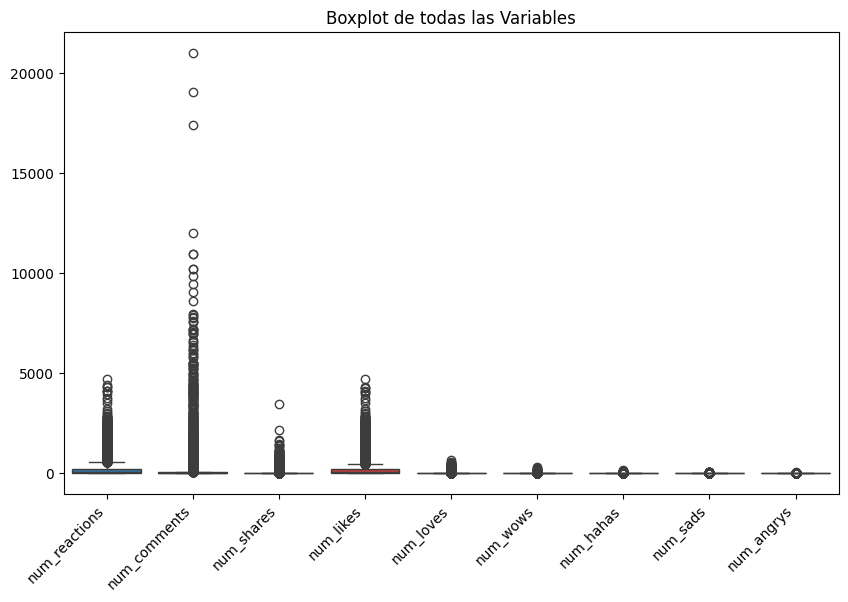

In [8]:
# VISUALIZACIÓN DE LA DISTRIBUCIÓN DE DATOS POR VARIABLE Y DETECCIÓN DE VARIABLES CON VALORES ATÍPICOS CON BOXPLOT
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['status_id', 'status_type', 'status_published', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 
    'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']])
plt.title('Boxplot de todas las Variables')
# Rotar las etiquetas en el eje x
plt.xticks(rotation=45, ha='right')
plt.show()

### Conclusiones al PASO 1.2.- Limpieza de la tabla, análisis de normalidad y visualización de valores atípicos

- El análisis de normalidad por varibale mediante del test de Shapiro revela que ninguna de las variables tiene una distribución gaussiana.


- Visualización de valores atípicos con Boxplot revela que todas las variables contienen un elevado número de valores atípicos.


- Como consecuencia, ante distribuciones no gaussianas y abundancia de valores atípicos, se decide realizar un preprocesamiento con ROBUSTSCALER.


## PASO 1.3.- Preprocesamiento con ROBUSTESCALER

In [9]:
# DATOS CON DISTRIBUCIÓN NO GAUSIANA Y CON VALORES ATÍPICOS ==> PREPROCESAR CON ROBUSTSACLER
from sklearn.preprocessing import RobustScaler, StandardScaler

# Columnas para RobustScaler
columnas_numericas = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
                      'num_hahas', 'num_sads', 'num_angrys']

# Traer las instancias de los escaladores
robust_scaler = RobustScaler()

# Aplicar RobustScaler a las columnas numéricas
df[columnas_numericas] = robust_scaler.fit_transform(df[columnas_numericas])

# Visualizar el nuevo DataFrame depurado y preprocesado
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,2016-09-24 02:58:00,0.146040,-0.173913,0.00,0.184799,0.000000,0.0,0.0,0.0,0.0
7046,1050855161656896_1061334757275603,photo,2016-09-23 11:19:00,-0.215347,-0.173913,0.00,-0.262295,0.333333,0.0,1.0,0.0,0.0
7047,1050855161656896_1060126464063099,photo,2016-09-21 23:03:00,-0.284653,-0.173913,0.00,-0.339791,0.333333,0.0,0.0,0.0,0.0
7048,1050855161656896_1058663487542730,photo,2016-09-20 00:43:00,1.443069,0.347826,5.50,1.734724,0.666667,0.0,0.0,0.0,0.0


### Conclusiones al PASO 1.3.- Preprocesamiento con ROBUSTESCALER

- Se observa que las variables presentan una distribución de datos más armonizada, que permitirá aplicar modelos diferentes sin que la variabilidad entre ellas represente un problema.


- Dado que mi intención es aplicar diferentes modelos a partir de este dataframe, voy a mantener este df como original y en los posteriores ensayos que realice los iré denominando de forma consecutiva como df_1, df_2, df_3... etc.

## PASO 1.4.- Agrupación mediante el algoritmo K-MEANS

- Para llevar a cabo la agrupación mediante el algoritmo K-means realizaré primero una reuducción de diminesionalidad con PCA, para lo que previamente será necesario una estandarización de las variables con StandarScaler para conseguir unos datos en los que todas las varibales partan con media=0 y desviación típica=1. 


- Mi idea es aplicar el K-means a diferentes reduciones de dimensionalidad (2 y 3 coponentes respectivamente) que permiten visualizaciones claras de las que también es factible extraer conclusiones.


- Trabajaré con df (el dataframe preprocesado) al que llamaré df_1 para el ensayo de K-meas con redución de dimenisonalidad a 2 dos componenetes y df_2 para el ensayo de K-meas con redución de dimenisonalidad a 3 dos componenetes.


- Una vez obtenida las respectivas agrupaciones, procederé a representar los datos, calcular los ínidces de Silhouette, el método Elbow y los ínidices ARI para que me permita comparar la reducción de dimensionalidad a 2 y 3 componentes.
. 

__CLASIFICAR MEDIANTE K-MEANS CON UNA <font color='blue'>REDUCCIÓN DE DIMENSIONALIDAD A DOS COMPONENETES Y TRES CLUSTERES__

In [10]:
# Renombro el DataFrame después de la transformación para mantener el df como original
df_1=df.copy()
df_1

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,2016-09-24 02:58:00,0.146040,-0.173913,0.00,0.184799,0.000000,0.0,0.0,0.0,0.0
7046,1050855161656896_1061334757275603,photo,2016-09-23 11:19:00,-0.215347,-0.173913,0.00,-0.262295,0.333333,0.0,1.0,0.0,0.0
7047,1050855161656896_1060126464063099,photo,2016-09-21 23:03:00,-0.284653,-0.173913,0.00,-0.339791,0.333333,0.0,0.0,0.0,0.0
7048,1050855161656896_1058663487542730,photo,2016-09-20 00:43:00,1.443069,0.347826,5.50,1.734724,0.666667,0.0,0.0,0.0,0.0


Coeficiente de Silueta: 0.8004876584164958


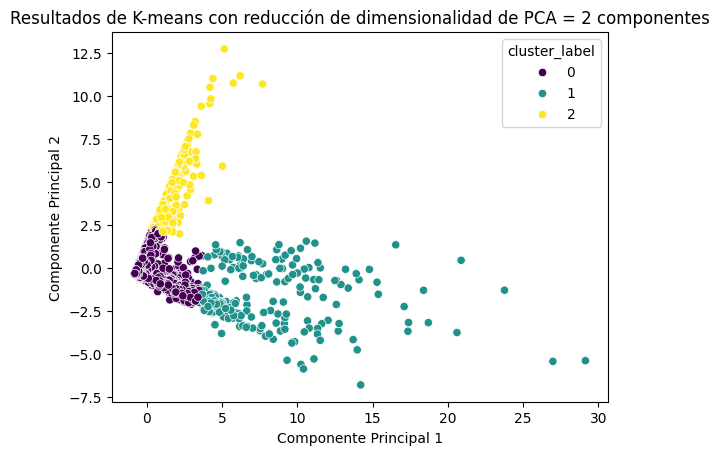

In [11]:
# CLASIFICAR MEDIANTE K-MEANS CON UNA REDUCCIÓN DE DIMENSIONALIDAD A DOS COMPONENETES Y TRES CLUSTERES.

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Extraer las características relevantes para el clustering
features_1 = df_1[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

# Estandarizar las características para PCA
scaler = StandardScaler()
features_1_standardized = scaler.fit_transform(features_1)

# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=2)  # Voy a probar primero a 2 componentes, porque permite una buena visualización
features_1_pca = pca.fit_transform(features_1_standardized)

# Convertir 'status_type' a valores numéricos usando Label Encoding
label_encoder = LabelEncoder()
df_1['status_type_encoded'] = label_encoder.fit_transform(df_1['status_type'])

# Ajustar el modelo K-means a los datos reducidos con PCA. Elijo nº de clusters = 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_1_pca)

# Asignar las etiquetas de los clústeres a cada registro
df_1['cluster_label'] = kmeans.labels_

# Calcular el coeficiente de silueta para evaluar la calidad del clustering
silhouette_avg_1 = silhouette_score(features_1_pca, kmeans.labels_)
print(f"Coeficiente de Silueta: {silhouette_avg_1}")

# Visualizar los resultados
sns.scatterplot(x=features_1_pca[:, 0], y=features_1_pca[:, 1], hue=df_1['cluster_label'], palette='viridis')
plt.title('Resultados de K-means con reducción de dimensionalidad de PCA = 2 componentes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

Número óptimo de clústers según el método Elbow: 4


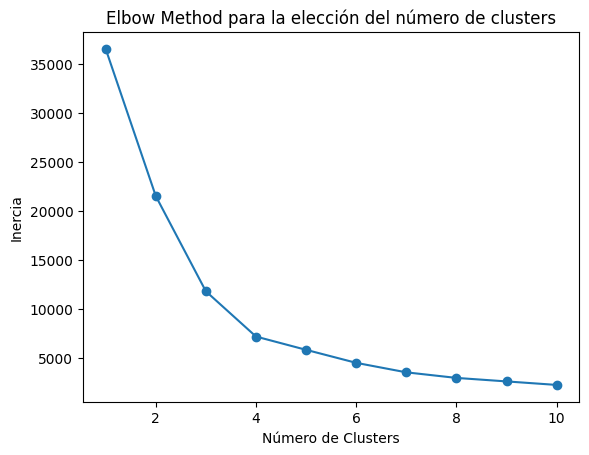

In [12]:
# MÉTODO ELBOW PARA K-MEANS CON UNA REDUCCIÓN DE DIMENSIONALIDAD A DOS COMPONENETES: 

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

# features_1_pca es mi conjunto de datos después de la reducción de dimensionalidad usando PCA y normalizado.

# Crear una lista para almacenar los valores de inercia
inertia_values = [] # En algunos textos a esta variable la llaman SSE

# Probar diferentes valores de k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_1_pca)
    inertia_values.append(kmeans.inertia_)
    
# Realizar el cálculo numérico del método Elbow
kl = KneeLocator(range(1, 11), inertia_values, curve="convex", direction="decreasing")
print(f"Número óptimo de clústers según el método Elbow: {kl.elbow}")

# Visualizar la curva de codo
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method para la elección del número de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

Número de Clusters: 2, ARI Score: 0.4159571652857189
Número de Clusters: 3, ARI Score: 0.31935127492913046
Número de Clusters: 4, ARI Score: 0.23357841097401313
Número de Clusters: 5, ARI Score: 0.23629743530519187
Número de Clusters: 6, ARI Score: 0.22919478598138854
Número de Clusters: 7, ARI Score: 0.22834591354008815
Número de Clusters: 8, ARI Score: 0.22240367959963284
Número de Clusters: 9, ARI Score: 0.22512953147754122
Número de Clusters: 10, ARI Score: 0.21549869110441083


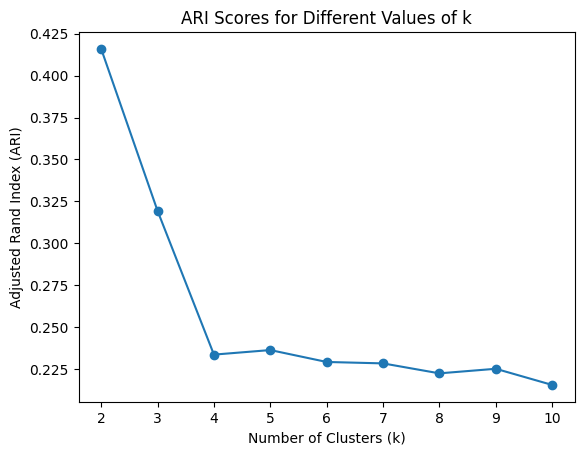

In [20]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

# Lista para almacenar los resultados del ARI
ari_scores = []

# Rango de números de clusters que quiero provar probar (Valores de K)
num_clusters_range = range(2, 11)

# Características relevantes para el clustering
features_1 = df_1[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

# Bucle sobre diferentes números de clusters
for num_clusters in num_clusters_range:
    # Ajustar el modelo K-means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(features_1)
    
    # Obtener las etiquetas de los clústeres
    cluster_labels = kmeans.labels_
    
    # Calcular el índice ARI
    ari = adjusted_rand_score(df_1['cluster_label'], cluster_labels)
    ari_scores.append(ari)

# Imprimir los resultados del ARI para cada número de clusters
for num_clusters, ari in zip(num_clusters_range, ari_scores):
    print(f'Número de Clusters: {num_clusters}, ARI Score: {ari}')
    
    
# Visualización de los resultados
plt.plot(num_clusters_range, ari_scores, marker='o')
plt.title('ARI Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.show()    

In [41]:
# Visulizar como queda df_1 tras las trasformaciones
df_1

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_encoded,cluster_label
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0,3,0
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0,1,0
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0,3,0
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0,1,0
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,2016-09-24 02:58:00,0.146040,-0.173913,0.00,0.184799,0.000000,0.0,0.0,0.0,0.0,1,0
7046,1050855161656896_1061334757275603,photo,2016-09-23 11:19:00,-0.215347,-0.173913,0.00,-0.262295,0.333333,0.0,1.0,0.0,0.0,1,0
7047,1050855161656896_1060126464063099,photo,2016-09-21 23:03:00,-0.284653,-0.173913,0.00,-0.339791,0.333333,0.0,0.0,0.0,0.0,1,0
7048,1050855161656896_1058663487542730,photo,2016-09-20 00:43:00,1.443069,0.347826,5.50,1.734724,0.666667,0.0,0.0,0.0,0.0,1,0


In [46]:
# Contar las Muestras en Cada Cluster:

cluster_counts = df_1['cluster_label'].value_counts()
cluster_counts

0    6431
2     376
1     243
Name: cluster_label, dtype: int64

In [47]:
# Calcular el Porcentaje de Muestras en Cada Cluster:

cluster_percentages = (cluster_counts / len(df)) * 100
cluster_percentages

0    91.219858
2     5.333333
1     3.446809
Name: cluster_label, dtype: float64

__CONCLUSIÓN CLASIFICAR MEDIANTE K-MEANS <font color='blue'>CON UNA REDUCCIÓN DE DIMENSIONALIDAD A DOS COMPONENETES Y TRES CLUSTERES__

- La __agrupación mediante K-means__ ha arrojado una distribución de los datos en tres clusteres claramente diferenciados para la mayoría de los registros, si bien al ananalizar el gráfico se observan que existen algunos registros que se encuentran en los límites de los clusters, y que por tanto podrían pertenecer a más de un cluster. 


- El __Indice de Silhouette obtenido de 0.8004876584164958__ es bastante alto y sugiere que __los clústeres generados por el modelo K-means están muy bien definidos y separados__. El coeficiente de silhouette varía en el rango de -1 a 1, donde un valor cercano a 1 indica que los puntos están bien ubicados dentro de sus clústeres y lejos de otros clústeres. Nuestro valor de 0.8 sugiere que los registros en cada clúster están relativamente cerca unos de otros y bastante separados de los registros en otros clústeres. En otras palabras, __el modelo K-means ha tenido éxito al agrupar los registros de manera coherente y distinguir claramente entre diferentes patrones en los datos__. Por lo tanto podemos concluir, según silhouete, que __la premisa de 3 clusters es correcta y que la reducción de dimensionalidad a 2 componenetes es efectiva__. 


- El __Indice Elbow__ por el contrario nos arroja un resultado de 4 (referido a una inercia de unas 7000 unidades), lo viene a indicar que según este método, el número óptimo de agrupaciones sería 4.


- El __Índice Adjusted Rand (ARI)__ es una métrica de evaluación para tareas de clustering que compara las etiquetas predichas por un algoritmo de clustering con las etiquetas verdaderas. Es un índice que nos permite evaluar la calidad de los clusters obtenidos por diferentes valores de k cuando agrupamos mediante el algoritmo de K-means. El número óptimo de clústeres sería aquel que resulta en el valor máximo del índice ARI. En nuestro ejercicio, el índice ARI nos revela que para nuestros datos procesados __el número ideal de agrupaciones sería 2__, y que a partir de ahí, cuantas más particiones hagamos de los datos, más precisión se perderá en el momento de asignar los datos a los clusters de forma segura. 
    
    
- En el __análisis de la distribución de registros por cluster__, se observa que el 91% de los registros sa han agrupado en un solo clúster, mientras que los otros dos recogen respectivamente 5% y el 3% de los registros, lo que da que pensar que la agrupación ha resultado bastante irregular.     

__CLASIFICAR MEDIANTE K-MEANS CON UNA <font color='blue'>REDUCCIÓN DE DIMENSIONALIDAD A TRES COMPONENETES Y TRES CLUSTERES__

In [14]:
# Renombro el DataFrame y trabajaré con df_2
df_2=df.copy()
df_2

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,2016-09-24 02:58:00,0.146040,-0.173913,0.00,0.184799,0.000000,0.0,0.0,0.0,0.0
7046,1050855161656896_1061334757275603,photo,2016-09-23 11:19:00,-0.215347,-0.173913,0.00,-0.262295,0.333333,0.0,1.0,0.0,0.0
7047,1050855161656896_1060126464063099,photo,2016-09-21 23:03:00,-0.284653,-0.173913,0.00,-0.339791,0.333333,0.0,0.0,0.0,0.0
7048,1050855161656896_1058663487542730,photo,2016-09-20 00:43:00,1.443069,0.347826,5.50,1.734724,0.666667,0.0,0.0,0.0,0.0


Coeficiente de Silueta: 0.7863464192996307


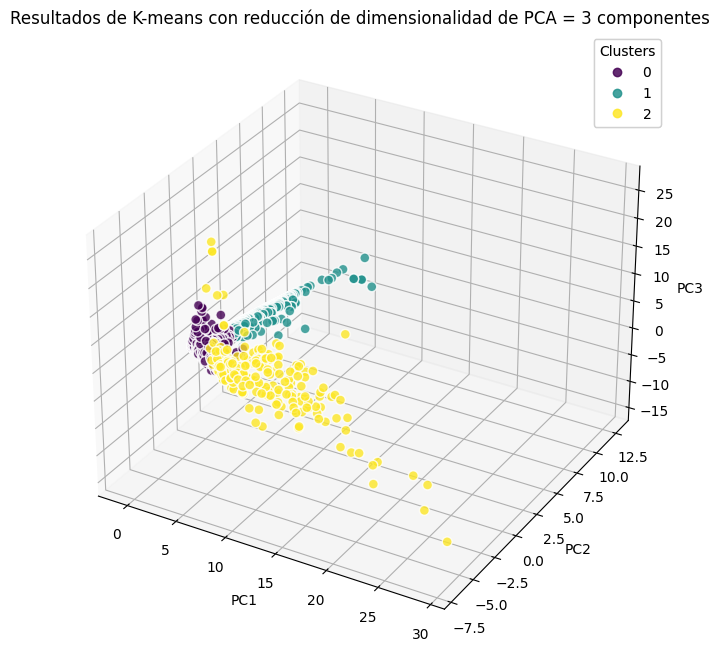

In [49]:
# CLASIFICAR MEDIANTE K-MEANS CON UNA REDUCCIÓN DE DIMENSIONALIDAD A TRES COMPONENETES Y TRES CLUSTERS

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Extraer las características relevantes para el clustering
features_2 = df_2[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

# Estandarizar las características para PCA
scaler = StandardScaler()
features_2_standardized = scaler.fit_transform(features_2)

# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=3)  # Ahora pruebo la reducción hasta 3 componentes
features_2_pca = pca.fit_transform(features_2_standardized)

# Convertir 'status_type' a valores numéricos usando Label Encoding
label_encoder = LabelEncoder()
df_2['status_type_encoded'] = label_encoder.fit_transform(df_2['status_type'])

# Ajustar el modelo K-means a los datos reducidos con PCA
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_2_pca)

# Asignar las etiquetas de los clústeres a cada registro
df_2['cluster_label'] = kmeans.labels_

# Calcular el coeficiente de silueta para evaluar la calidad del clustering
silhouette_avg_2 = silhouette_score(features_2_pca, kmeans.labels_)
print(f"Coeficiente de Silueta: {silhouette_avg_2}")

# Visualizar los resultados en 3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear una figura y un conjunto de ejes 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Visualizar los puntos en el gráfico 3D con colores según el clúster asignado
scatter = ax.scatter(
    features_2_pca[:, 0],  # Componente principal 1
    features_2_pca[:, 1],  # Componente principal 2
    features_2_pca[:, 2],  # Componente principal 3
    c=df_2['cluster_label'],  # Colores según los clústeres
    cmap='viridis',  # Mapa de colores (puede cambiarse según preferencias)
    s=50,  # Tamaño de los puntos
    edgecolors='w',  # Color del borde de los puntos
    alpha=0.8  # Transparencia
)

# Añadir etiquetas y título al gráfico
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Resultados de K-means con reducción de dimensionalidad de PCA = 3 componentes')

# Añadir la leyenda basada en los colores de los clústeres
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

# Mostrar el gráfico
plt.show()

Número óptimo de clústers según el método Elbow: 4


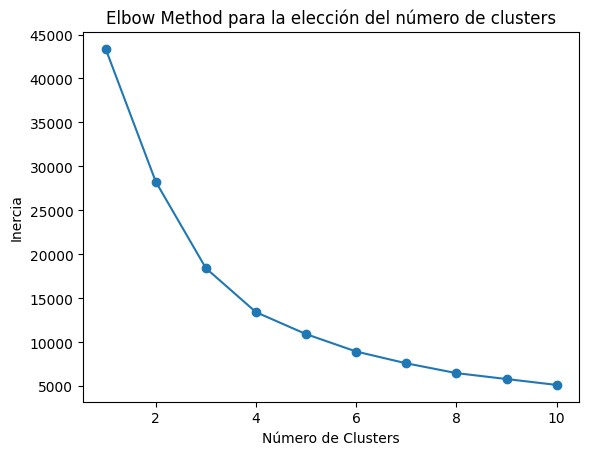

In [16]:
# MÉTODO ELBOW PARA K-MEANS CON UNA REDUCCIÓN DE DIMENSIONALIDAD A TRES COMPONENETES: 

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

# features_1_pca es mi conjunto de datos después de la reducción de dimensionalidad usando PCA y normalizado.

# Crear una lista para almacenar los valores de inercia
inertia_values = [] # En algunos textos a esta variable la llaman SSE

# Probar diferentes valores de k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_2_pca)
    inertia_values.append(kmeans.inertia_)
    
# Realizar el cálculo numérico del método Elbow
kl = KneeLocator(range(1, 11), inertia_values, curve="convex", direction="decreasing")
print(f"Número óptimo de clústers según el método Elbow: {kl.elbow}")

# Visualizar la curva de codo
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method para la elección del número de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

In [17]:
df_2

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_encoded,cluster_label
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0,3,0
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0,1,0
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0,3,0
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0,1,0
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,2016-09-24 02:58:00,0.146040,-0.173913,0.00,0.184799,0.000000,0.0,0.0,0.0,0.0,1,0
7046,1050855161656896_1061334757275603,photo,2016-09-23 11:19:00,-0.215347,-0.173913,0.00,-0.262295,0.333333,0.0,1.0,0.0,0.0,1,0
7047,1050855161656896_1060126464063099,photo,2016-09-21 23:03:00,-0.284653,-0.173913,0.00,-0.339791,0.333333,0.0,0.0,0.0,0.0,1,0
7048,1050855161656896_1058663487542730,photo,2016-09-20 00:43:00,1.443069,0.347826,5.50,1.734724,0.666667,0.0,0.0,0.0,0.0,1,0


Número de Clusters: 2, ARI Score: 0.4526535381947613
Número de Clusters: 3, ARI Score: 0.3593835554453359
Número de Clusters: 4, ARI Score: 0.26717877576089655
Número de Clusters: 5, ARI Score: 0.2689828933076593
Número de Clusters: 6, ARI Score: 0.2620863939812367
Número de Clusters: 7, ARI Score: 0.261147396578123
Número de Clusters: 8, ARI Score: 0.2544227805268415
Número de Clusters: 9, ARI Score: 0.25736276610965425
Número de Clusters: 10, ARI Score: 0.24498789451204844


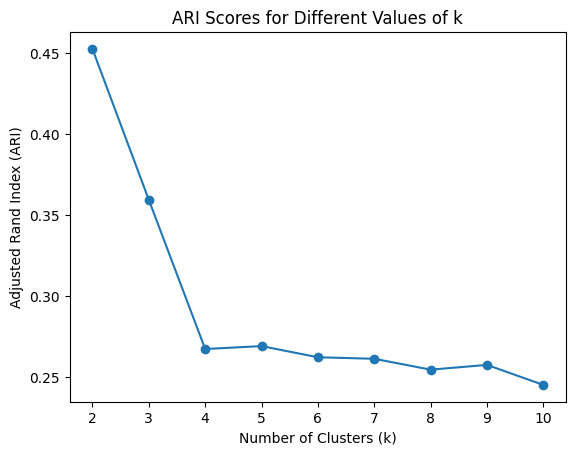

In [19]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

# Lista para almacenar los resultados del ARI
ari_scores = []

# Rango de números de clusters que quiero provar probar (Valores de K)
num_clusters_range = range(2, 11)

# Características relevantes para el clustering
features_2 = df_2[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

# Bucle sobre diferentes números de clusters
for num_clusters in num_clusters_range:
    # Ajustar el modelo K-means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(features_2)
    
    # Obtener las etiquetas de los clústeres
    cluster_labels = kmeans.labels_
    
    # Calcular el índice ARI
    ari = adjusted_rand_score(df_2['cluster_label'], cluster_labels)
    ari_scores.append(ari)

# Imprimir los resultados del ARI para cada número de clusters
for num_clusters, ari in zip(num_clusters_range, ari_scores):
    print(f'Número de Clusters: {num_clusters}, ARI Score: {ari}')
    
    
# Visualización de los resultados
plt.plot(num_clusters_range, ari_scores, marker='o')
plt.title('ARI Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.show()    

In [44]:
# Contar las Muestras en Cada Cluster:

cluster_counts = df_2['cluster_label'].value_counts()
cluster_counts

0    6398
1     374
2     278
Name: cluster_label, dtype: int64

In [45]:
# Calcular el Porcentaje de Muestras en Cada Cluster:

cluster_percentages = (cluster_counts / len(df)) * 100
cluster_percentages

0    90.751773
1     5.304965
2     3.943262
Name: cluster_label, dtype: float64

__CONCLUSIÓN CLASIFICAR MEDIANTE K-MEANS <font color='blue'>CON UNA REDUCCIÓN DE DIMENSIONALIDAD A TRES COMPONENETES Y TRES CLUSTERES__

- Al realizar la __agrupación mediante K-means__ con una reducción de dimensionalidad a 3 componentes como premisa, permite obtener una representación espacial en la que se observan que los tres clusters siguen una distribución estérica bien diferenciada en la mayoría de los registros, salvo una zona central en la que se observa que coinciden los tres clusters y la asignación a uno u otro agrupamiento podría deberse al azar. 


- El __Indice de Silhouette obtenido de 0.7863464192996307__ es algo menor que el que se conseguía con la reduccion de dimensionalidad a 2 componentes, por lo que para este conjunto de datos, no se puede afirmar que una mayor dimensionalidad haya aportado ventajas al K-means en el momento de realizar agrupaciones claramente diferenciadas. 


- El __Indice Elbow__ en este caso también nos arroja un resultado de 4, pero referido a este caso a una inercia de unas 14.000 unidades, prácticamente el doble que el anterior, lo que nos induce a pensar que la reducción de dimensionalidad a 2 componentes permite al algoritmo k-means trabajar de una forma más eficiente.


- En el __Índice Adjusted Rand (ARI)__, al igual qué el ínide Elbow también arroja reusltados similares para ambas reducciones de dimensionalidad, revelando que para nuestros conjunto de datos procesados __el número ideal de agrupaciones sería 2__, y que a partir de ahí, cuantas más particiones hagamos de los datos, más precisión se perderá en el momento de asignar los datos a los clusters de forma segura. 
    
    
- El __análisis de la distribución de registros por cluster__ también arroja unos resultados muy similares al análisis con reducción de dimensionalidad a 2 componentes, observándose unas distribuciones aproximadas del 90%, 5% y 4% por cada cluster, lo que al igual que en análisis anterior nos induce a pensar que el ejercicio de  agrupación ha resultado bastante irregular.         

<font color='blue'>__.........................................................................................................................................................................................................................................................................__

# EJERCICIO 2
Clasifica los distintos registros utilizando el algoritmo de clustering jerárquico.

In [21]:
df_3=df.copy()
df_3

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,2016-09-24 02:58:00,0.146040,-0.173913,0.00,0.184799,0.000000,0.0,0.0,0.0,0.0
7046,1050855161656896_1061334757275603,photo,2016-09-23 11:19:00,-0.215347,-0.173913,0.00,-0.262295,0.333333,0.0,1.0,0.0,0.0
7047,1050855161656896_1060126464063099,photo,2016-09-21 23:03:00,-0.284653,-0.173913,0.00,-0.339791,0.333333,0.0,0.0,0.0,0.0
7048,1050855161656896_1058663487542730,photo,2016-09-20 00:43:00,1.443069,0.347826,5.50,1.734724,0.666667,0.0,0.0,0.0,0.0


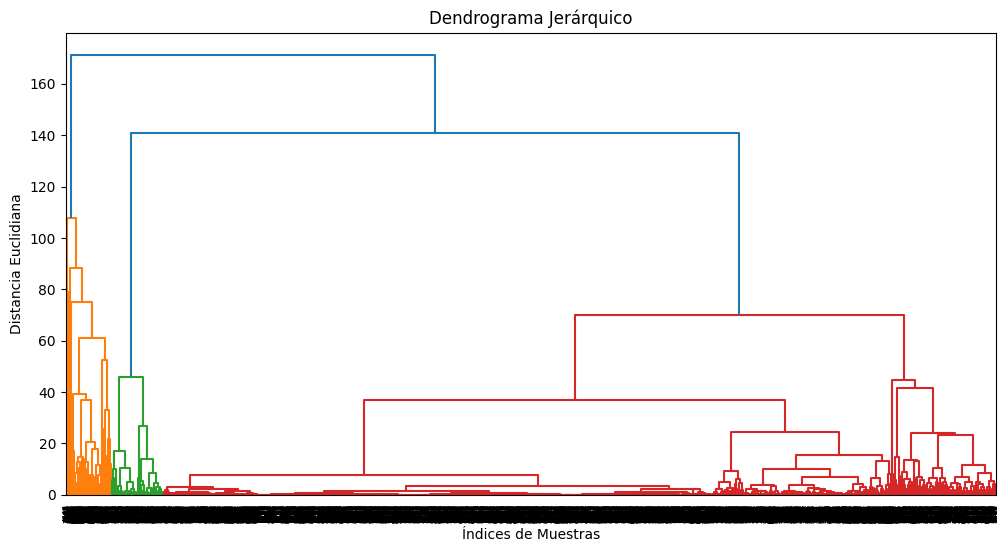

In [25]:
# CODIGO PARA EL CLUSTERING JERÁRQUICO

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Seleccionar las características relevantes para el clustering
features = df_3[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

# Estandarizar las características con StandarScaler para que tengan media=0 y desviación standar=1
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Calcular la matriz de enlace (linkage matrix) para el clustering jerárquico con el método ward
linkage_matrix = linkage(features_standardized, method='ward')  

# Visualizar el dendrograma para determinar el número óptimo de clusters
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Dendrograma Jerárquico')
plt.xlabel('Índices de Muestras')
plt.ylabel('Distancia Euclidiana')
plt.show()


__CONCLUSIÓN A LA APLICACIÓN DEL CLUSTERING JERÁRQUICO__

Basándome en el dendrograma observo que para una distancia Euclidiana de aproximadamente 110 unidades, el algoritmo arroja un __número óptimo de clusters=3__. 

Teniendo en cuenta este dato, voy a proceder a ajustar el modelo de clustering jerárquico con número de clusters=3 y voy a proceder a solicitar visualizaciones por parejas de las tres variables mayoritarias:'num_reactions', 'num_comments' y 'num_shares'. 

El motivo de no considerár el resto de variables para la visualización es porque 'num_reactions' se corresponde con la suma de las variables: 'num_likes', 'num_loves',	'num_wows',	'num_hahas', 'num_sads' y 'num_angrys', por lo tanto, las reacciones obtenidas en cada columna independiente ya están integradas, de una u otra forma en la columna final 'num_reactions'.

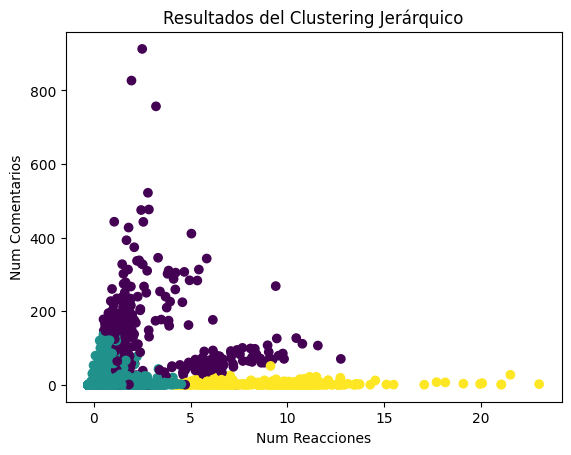

In [26]:
# Ajustar el modelo de clustering jerárquico con número de clusters=3

num_clusters = 3  
hierarchical_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
df_3['hierarchical_cluster_label'] = hierarchical_clustering.fit_predict(features_standardized)


# Visualizar los resultados del clustering en el espacio de las variables 'num_reactions' y 'num_comments'
plt.scatter(df_3['num_reactions'], df_3['num_comments'], c=df_3['hierarchical_cluster_label'], cmap='viridis')
plt.title('Resultados del Clustering Jerárquico para Reacciones/Comentarios')
plt.xlabel('Num Reacciones')
plt.ylabel('Num Comentarios')
plt.show()

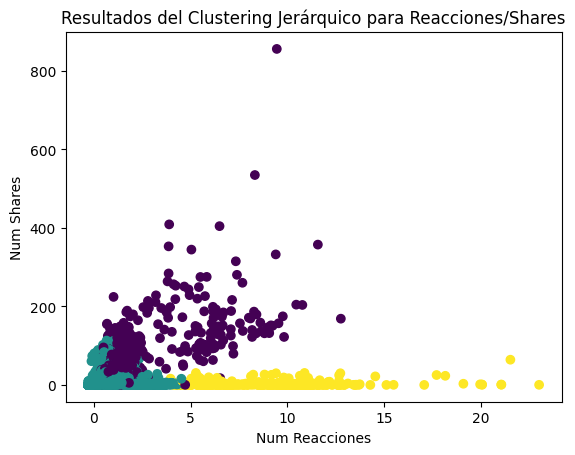

In [50]:
# Visualizar los resultados del clustering en el espacio de las variables 'num_reactions' y 'num_shares'
plt.scatter(df_3['num_reactions'], df_3['num_shares'], c=df_3['hierarchical_cluster_label'], cmap='viridis')
plt.title('Resultados del Clustering Jerárquico para Reacciones/Shares')
plt.xlabel('Num Reacciones')
plt.ylabel('Num Shares')
plt.show()

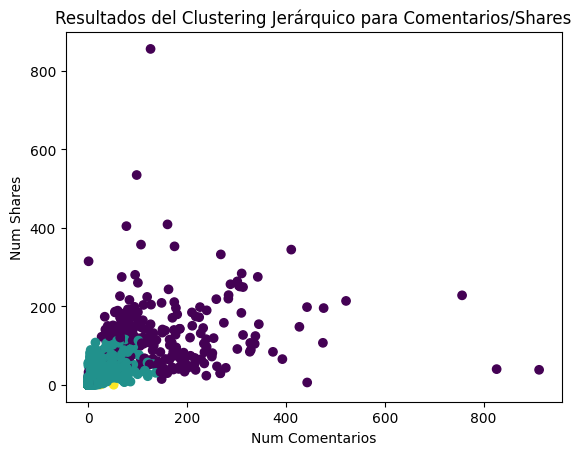

In [28]:
# Visualizar los resultados del clustering en el espacio de las variables 'num_reactions' y 'num_shares'
plt.scatter(df_3['num_comments'], df_3['num_shares'], c=df_3['hierarchical_cluster_label'], cmap='viridis')
plt.title('Resultados del Clustering Jerárquico para Comentarios/Shares')
plt.xlabel('Num Comentarios')
plt.ylabel('Num Shares')
plt.show()

__CONCLUSIONES A LAS VISUALIZACIONES POR PARES DE VARIABLES__

Estas tres visualizaciones nos permiten formarnos una idea de qué criteriors ha seguigo el algoritmo para la agrupación de los diferentes registros. Estas son algunas de las conclusiones.

1.- Uno de los clusteres (el representado por los registros azul en estas visualizaciones) recoge la gran mayoría de los registros de publicacones que no han sido capaces de provocar una alta participacion en los usuarios, ya sea a nivel de comentarios, shares o reacciones en general. Es decir, este cluster agrupa a las publicaciones que han despertado un interés moderado en los usuarios y que no han provocado una participación muy significativa de los usuarios.

2.- El grupo representado por el color amarillo aglutina a los registros que han provocado reacciones en los usuarios. Como estas reacciones hemos dicho que son 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads' y 'num_angrys' podríamos afirmar que este cluster agrupa principalmente aquellas publicaciones que han tenido capacidad para apelar a la componente sentimental y emocional de los usuarios.

3.- El grupo representado por el color lila aglutina a los registros que han provocado una alta participación de los usuarios a todos los niveles, ya sea dejando comentarios, o compartiendo la información con otros usarios, y en algo menor medida provocando reacciones emocionales. Los post que se incluyen en este grupo y su tipo de contenidos serían, sin ninguna duda, los más apropiados para ser seleccionados para realizar campañas promocionales sobre Tailandia, ya sea en la propia red social o en otros medios.


In [29]:
# Visualización de la tabla tras la lusterización jerárquica.
df_3

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hierarchical_cluster_label
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0,1
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0,1
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0,1
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0,1
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,2016-09-24 02:58:00,0.146040,-0.173913,0.00,0.184799,0.000000,0.0,0.0,0.0,0.0,1
7046,1050855161656896_1061334757275603,photo,2016-09-23 11:19:00,-0.215347,-0.173913,0.00,-0.262295,0.333333,0.0,1.0,0.0,0.0,1
7047,1050855161656896_1060126464063099,photo,2016-09-21 23:03:00,-0.284653,-0.173913,0.00,-0.339791,0.333333,0.0,0.0,0.0,0.0,1
7048,1050855161656896_1058663487542730,photo,2016-09-20 00:43:00,1.443069,0.347826,5.50,1.734724,0.666667,0.0,0.0,0.0,0.0,1


In [31]:
# Contar las Muestras en Cada Cluster:

cluster_counts = df_3['hierarchical_cluster_label'].value_counts()
cluster_counts

1    6309
2     393
0     348
Name: hierarchical_cluster_label, dtype: int64

In [33]:
# Calcular el Porcentaje de Muestras en Cada Cluster:

cluster_percentages = (cluster_counts / len(df)) * 100
cluster_percentages

1    89.489362
2     5.574468
0     4.936170
Name: hierarchical_cluster_label, dtype: float64

El __análisis de la distribución de registros por cluster__ que desvela el algoritmo del __CLUSTER JERÁRQUICO__ no difiere apenas con los ensayos realizados con el algoritmo K-measn. En este caso las distribuciones aproximadas son del 89%, 6% y 5% por cada cluster. No se puede afirmar que la agrupación realizada por este método sea sigunificativamente diferente a los métodos anteriores.

<font color='blue'>__.........................................................................................................................................................................................................................................................................__

# EJERCICIO 3
Calcula el rendimiento del clustering mediante un parámetro como puede ser silhouette.

__RESPUESTA AL EJERCICIO 3__

Los rendimientos del clustering mediante parámetros como silhouete, Elbow y ARI ya han sido calculados, expresados y comentados en cada uno de los ejercicios de agrupación que se han realizado en los apartados anteriores.

<font color='blue'>__.........................................................................................................................................................................................................................................................................__